<a href="https://colab.research.google.com/github/10Exahertz/Text-ResNet-on-Sentimental-LIAR-Fake-News/blob/main/Sentimental_LIAR_SIMPLE_Feed_Forward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This is the code for the paper: https://github.com/10Exahertz/Text-ResNet-on-Sentimental-LIAR-Fake-News

Sentimental LIAR: Extended Corpus with a simple Feed Forward Network

This Network was created for testing purposes to ensure that the ResNet and CNN architectures were actually using the statements embeddings to make decisions. Based on the performance slash we get here we can say it indeed does.

In [ ]:
!pip install -q transformers
!pip install sentencepiece

In [ ]:

import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Bibek/LIAR-DATASET ORIGINAL/final/train_final.csv")
df_test=pd.read_csv("/content/drive/MyDrive/Bibek/LIAR-DATASET ORIGINAL/final/test_final.csv")
df_valid=pd.read_csv("/content/drive/MyDrive/Bibek/LIAR-DATASET ORIGINAL/final/valid_final.csv")
print("before truncating size of data is :", df.shape, df_test.shape,df_valid.shape)
df=df[:10232] #10208
df_test=df_test[:1264] #1248
df_valid=df_valid[:1280] #1280
print("size of data is :", df.shape, df_test.shape, df_valid.shape)


#check if any null values are present
print("Any null in Subject? ",df['subject'].isnull().values.any())
print("Any null in Speaker? ",df['speaker'].isnull().values.any())
print("Any null in speaker_job? ",df['speaker_job'].isnull().values.any())
print("Any null in Party? ",df['party_affiliation'].isnull().values.any())
print("Any null in Context? ",df['context'].isnull().values.any())


# def listV2Out(inputLabel):
#   if inputLabel == 'pants-fire':
#     return '[1,0,0,0,0]'
#   if inputLabel == 'false':
#     return '[0,1,0,0,0]'
#   if inputLabel == 'barely-true':
#     return '[0,0,1,0,0]'
#   if inputLabel == 'half-true':
#     return '[0,0,0,1,0]'
#   if inputLabel == 'mostly-true':
#     return '[0,0,0,0,1]'
#   if inputLabel == 'true':
#     return '[0,0,0,0,1]'
# pd.set_option('display.max_columns', None)
# df['listV2'] = 0
# for i in range(len(df)):
#   df.loc[i,'listV2'] = listV2Out(df.loc[i,'label'])
# df_test['listV2'] = 0
# for i in range(len(df_test)):
#   df_test.loc[i,'listV2'] = listV2Out(df_test.loc[i,'label'])
# df_valid['listV2'] = 0
# for i in range(len(df_valid)):
#   df_valid.loc[i,'listV2'] = listV2Out(df_valid.loc[i,'label'])

# print("Any null in ListV2? ",df['listV2'].isnull().values.any())


before truncating size of data is : (10236, 31) (1267, 30) (1283, 31)
size of data is : (10232, 31) (1264, 30) (1280, 31)
Any null in Subject?  False
Any null in Speaker?  False
Any null in speaker_job?  True
Any null in Party?  False
Any null in Context?  True


In [ ]:

df['comment_text']=""
df_test['comment_text']=""
df_valid["comment_text"]=""

#combine all the columns into one for train, test and valid data

# df['comment_text']=df['subject'].astype(str)+ ". "+ df["statement"]+\
# df['speaker_id'].astype(str)+". "+df['speaker_job'].astype(str)+". "+ df['party_affiliation'].astype(str)\
# +". "+df['context'].astype(str)+". "+df['sentiment_code'].astype(str)
df['comment_text']= df['sentiment'].astype(str)

# df_test['comment_text']=df_test['subject'].astype(str)+ ". "+ df_test["statement"]+". "+\
# df_test['speaker_id'].astype(str)+". "+df_test['speaker_job'].astype(str)+". "+ df_test['party_affiliation'].astype(str)\
# +". "+df_test['context'].astype(str)+". "+df['sentiment_code'].astype(str)
df_test['comment_text']= df_test['sentiment'].astype(str)

# df_valid['comment_text']=df_valid['subject'].astype(str)+ ". "+ df_valid["statement"]+\
# df_valid['speaker_id'].astype(str)+". "+df_valid['speaker_job'].astype(str)+". "+ df_valid['party_affiliation'].astype(str)\
# +". "+df_valid['context'].astype(str)+". "+df_valid['sentiment_code'].astype(str)
df_valid['comment_text']= df_valid['sentiment'].astype(str)


In [ ]:

#concatenate emotion, speakers' credit and sentiment score togehter
df['emotion']="["+df['anger'].astype(str)+","+df['disgust'].astype(str)+","\
+df['fear'].astype(str)+","+df['joy'].astype(str)+","+df['sad'].astype(str) + ","+df['sentiment_score'].astype(str) +"]" #+","+\
# df["barely_true_counts"].astype(str) +","+ df["false_counts"].astype(str)  +","+\
# df["half_true_counts"].astype(str) + ","+df["mostly_true_counts"].astype(str) +","+ \
# df["pants_on_fire_counts"].astype(str)+","+df["sentiment_score"].astype(str)+"]"


df_test['emotion']="["+df_test['anger'].astype(str)+","+df_test['disgust'].astype(str)+","\
+df_test['fear'].astype(str)+","+df_test['joy'].astype(str)+","+df_test['sad'].astype(str) +","+df_test['sentiment_score'].astype(str) + "]"
# + ","+df_test["barely_true_counts"].astype(str) + ","+ df_test["false_counts"].astype(str) \
# +","+ df_test["half_true_counts"].astype(str) +","+ df_test["mostly_true_counts"].astype(str)\
# +","+ df_test["pants_on_fire_counts"].astype(str)+","+df_test["sentiment_score"].astype(str)+"]"


df_valid['emotion']="["+df_valid['anger'].astype(str)+","+df_valid['disgust'].astype(str)+","\
+df_valid['fear'].astype(str)+","+df_valid['joy'].astype(str)+","+df_valid['sad'].astype(str)+","+df_valid['sentiment_score'].astype(str)+"]"
# + ","+df_valid["barely_true_counts"].astype(str) + ","+ df_valid["false_counts"].astype(str) \
# +","+ df_valid["half_true_counts"].astype(str) +","+ df_valid["mostly_true_counts"].astype(str)\
# +","+ df_valid["pants_on_fire_counts"].astype(str)+","+df_valid["sentiment_score"].astype(str)+"]"

In [ ]:
#target should be converted from string to the list
import ast
def convert_to_list(text):
  return ast.literal_eval(text)

In [ ]:
for i in range(len(df["emotion"])):
  try:
    df["emotion"][i]=convert_to_list(df["emotion"][i])
  except:
    print(i,"====",df["emotion"][1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
for i in range(len(df_valid["emotion"])):
  try:
    df_valid["emotion"][i]=convert_to_list(df_valid["emotion"][i])
  except:
    print(i,"====",df_valid["emotion"][i], type(df_valid["emotion"][i]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
for i in range(len(df_test["emotion"])):
  try:
    df_test["emotion"][i]=convert_to_list(df_test["emotion"][i])
  except:
    print(i,"====",df_test["emotion"][i], type(df_test["emotion"][i]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:

df['list']=df['list'].apply(convert_to_list)
df_test['list']=df_test['list'].apply(convert_to_list)
df_valid['list']=df_valid['list'].apply(convert_to_list)

# df['listV2']=df['listV2'].apply(convert_to_list)
# df_test['listV2']=df_test['listV2'].apply(convert_to_list)
# df_valid['listV2']=df_valid['listV2'].apply(convert_to_list)

for i in range(len(df)):
  if df.loc[i,'list'][1] == 0:
    df.loc[i,'list'] = 1
  else:
    df.loc[i,'list'] = 0

for i in range(len(df_test)):
  if df_test.loc[i,'list'][1] == 0:
    df_test.loc[i,'list'] = 1
  else:
    df_test.loc[i,'list'] = 0

for i in range(len(df_valid)):
  if df_valid.loc[i,'list'][1] == 0:
    df_valid.loc[i,'list'] = 1
  else:
    df_valid.loc[i,'list'] = 0



In [ ]:
 
import numpy as np
import pandas as pd
from sklearn import metrics
import transformers
import torch
torch.cuda.empty_cache()
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertConfig, BertModel, BertTokenizer, ElectraTokenizer, ElectraModel, ElectraConfig
 
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
 
MAX_LEN = 300
TRAIN_BATCH_SIZE = 64
VALID_BATCH_SIZE = 64
EPOCHS = 25
LEARNING_RATE = 1e-03
#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenizer = ElectraTokenizer.from_pretrained('google/electra-base-discriminator')
#tokenizer.pad_token = tokenizer.eos_token
 
 
import torch
import torch.nn as nn
import torch.nn.functional as F
#torch.manual_seed(0)

In [ ]:
class CustomDataset(Dataset):

    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.comment_text = dataframe.comment_text
        self.targets = dataframe.list
        self.max_len = max_len
        #Add emotion list from dataframe
        self.emotion=dataframe.emotion
        self.dfID=dataframe.ID

    def __len__(self):
        return len(self.comment_text)

    def __getitem__(self, index):
        comment_text = str(self.comment_text[index])
        comment_text = " ".join(comment_text.split())

        inputs = self.tokenizer.encode_plus(
            comment_text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True,
            truncation=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'targets': torch.tensor(self.targets[index], dtype=torch.float),
            'emotion':torch.tensor(self.emotion[index], dtype=torch.float),
        }

In [ ]:
# Creating the dataset and dataloader for the neural network

train_size = 1
train_dataset=df.sample(frac=train_size,random_state=200).reset_index(drop=True)
test_dataset=df_test.sample(frac=train_size,random_state=200).reset_index(drop=True)
valid_dataset=df_valid.sample(frac=1,random_state=200).reset_index(drop=True)


print("FULL Dataset: {}".format(df.shape))
print("TRAIN Dataset: {}".format(train_dataset.shape))
print("TEST Dataset: {}".format(test_dataset.shape))
print("VALID Dataset: {}".format(valid_dataset.shape))

training_set = CustomDataset(train_dataset, tokenizer, MAX_LEN)
testing_set = CustomDataset(test_dataset, tokenizer, MAX_LEN)
valid_set= CustomDataset(valid_dataset, tokenizer, MAX_LEN)
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }
print(type(df.loc[0,'emotion']))
print(type(df_test.loc[0,'emotion']))
training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)
valid_loader=DataLoader(valid_set,**test_params)

FULL Dataset: (10232, 33)
TRAIN Dataset: (10232, 33)
TEST Dataset: (1264, 32)
VALID Dataset: (1280, 33)
<class 'list'>
<class 'list'>


In [ ]:
# Creating the customized model, by adding a drop out and a dense layer on top of BERT-base to get the final output for the model. 
from torch import nn
 
class FeedForward(nn.Module):
  def __init__ (self, input_size, hidden1size, hidden2size, hidden3size, n_classes):
    super(FeedForward, self).__init__()
    self.l1 = nn.Linear(input_size, hidden1size)
    self.l2 = nn.Linear(hidden1size, hidden2size)
    self.l22 = nn.Linear(hidden2size, hidden3size)
    self.l3 = nn.Linear(hidden3size, n_classes)
    
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(0.2)

  def forward(self, x):
    x = self.l1(x)
    x = self.relu(x)
    x = self.l2(x)
    x = self.relu(x)

    x = self.l22(x)
    x = self.relu(x)

    x = self.l3(x)
    return x



 
model = FeedForward(6, 50,25,7,2)

In [ ]:
model.to(device)

FeedForward(
  (l1): Linear(in_features=6, out_features=50, bias=True)
  (l2): Linear(in_features=50, out_features=25, bias=True)
  (l22): Linear(in_features=25, out_features=7, bias=True)
  (l3): Linear(in_features=7, out_features=2, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
)

In [ ]:
 
import time
import datetime
def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))    
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

In [ ]:
#TRAIN THE MODEL
val_losses=[]
train_losses=[]
accuracy_list=[]
 
n_total_steps = len(training_loader)
for epoch in range(EPOCHS):
    t0 = time.time()
    batch=0
    train_loss=0
    for _,data in enumerate(training_loader, 0):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]

        targets = data['targets'].to(device, dtype = torch.long)
        emotions=data['emotion'].to(device,dtype=torch.float)
        
        # Forward pass
        outputs = model(emotions)
        loss = criterion(outputs, targets)
        train_loss+=loss.item()
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch +=1
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

    print(f"   Epoch: {epoch} Train loss is :{train_loss/batch}") 
    train_loss /=batch
    train_losses.append(train_loss)    
    print(f"   Epoch {epoch} took: {format_time(time.time() - t0)} \n")

    # Test the model
    # In test phase, we don't need to compute gradients (for memory efficiency)
    fin_targets=[]
    fin_outputs=[]
    with torch.no_grad():
        val_loss, batch = 0, 1
        n_correct = 0
        n_samples = 0
        for emotions, targets in testing_loader:
            targets = data['targets'].to(device, dtype = torch.long)
            emotions=data['emotion'].to(device,dtype=torch.float)
            outputs = model(emotions)
            loss = criterion(outputs, targets)
            val_loss+=loss.item()
            # max returns (value ,index)
            _, predicted = torch.max(outputs.data, 1)
            n_samples += targets.size(0)
            n_correct += (predicted == targets).sum().item()
            fin_targets.extend(targets.cpu().detach().numpy().tolist())
            fin_outputs.extend(predicted.cpu().detach().numpy().tolist())
            batch +=1
        val_loss/=batch
        val_losses.append(val_loss)

        outputs=fin_outputs
        #outputs = np.array(outputs) >= 0.5
        targets=fin_targets

        acc = 100.0 * n_correct / n_samples
        f1_score_micro = metrics.f1_score(targets, outputs, average='micro')
        f1_score_macro = metrics.f1_score(targets, outputs, average='macro')
        print(f'Accuracy of the network on the 10000 test samples: {acc} %')
        print(f"Epoch: {epoch} - F1 Score on Testing Data (Micro) = {f1_score_micro}")
        print(f"Epoch: {epoch} - F1 Score on Testing Data (Macro) = {f1_score_macro}")
  #if train_loss > val_loss:
  # torch.save(model.state_dict(), "/content/drive/My Drive/Bibek/models_saved/w9p7")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


   Epoch: 0 Train loss is :0.6652195528149605
   Epoch 0 took: 0:00:03 

Accuracy of the network on the 10000 test samples: 69.64285714285714 %
Epoch: 0 - F1 Score on Testing Data (Micro) = 0.6964285714285714
Epoch: 0 - F1 Score on Testing Data (Macro) = 0.4105263157894737
   Epoch: 1 Train loss is :0.6496337171643972
   Epoch 1 took: 0:00:03 

Accuracy of the network on the 10000 test samples: 55.357142857142854 %
Epoch: 1 - F1 Score on Testing Data (Micro) = 0.5535714285714286
Epoch: 1 - F1 Score on Testing Data (Macro) = 0.3563218390804598
   Epoch: 2 Train loss is :0.6488744519650936
   Epoch 2 took: 0:00:03 

Accuracy of the network on the 10000 test samples: 58.92857142857143 %
Epoch: 2 - F1 Score on Testing Data (Micro) = 0.5892857142857143
Epoch: 2 - F1 Score on Testing Data (Macro) = 0.37078651685393255
   Epoch: 3 Train loss is :0.6478083848953247
   Epoch 3 took: 0:00:03 

Accuracy of the network on the 10000 test samples: 62.5 %
Epoch: 3 - F1 Score on Testing Data (Micro) =

In [ ]:
from pandas import DataFrame
df=DataFrame(train_losses,columns=['train_losses'])
df=DataFrame(val_losses,columns=['val_losses'])
#df.to_csv("/content/drive/My Drive/Bibek/Results/w10_p4.csv")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[0.6652195528149605, 0.6496337171643972, 0.6488744519650936, 0.6478083848953247, 0.6475648485124111, 0.6471827451139689, 0.646854442730546, 0.6468621317297221, 0.6467893179506063, 0.646544038131833, 0.6465482525527477, 0.6466704495251179, 0.6463798366487026, 0.6465722870081663, 0.6463887892663479, 0.6463968951255084, 0.6461730793118476, 0.6463789332658052, 0.6461273971945047, 0.6460659001022577, 0.6461311113089323, 0.6458036348223686, 0.6458944506943226, 0.6460348352789879, 0.6460085522383452]
[0.5942293008168539, 0.6742357640039354, 0.6484649862561908, 0.6196513630094982, 0.6214621521177746, 0.574740625563122, 0.6807942049843925, 0.669665393375215, 0.6471505619230724, 0.5860766342708043, 0.6072858401707241, 0.6029003574734643, 0.6484275204794747, 0.6191725390298026, 0.5981045109885079, 0.5965724445524669, 0.6490132354554676, 0.6649724642435709, 0.6074367818378267, 0.6718585037049793, 0.5965004080817813, 0.6409315268198649, 0.6864572139013381, 0.6191714037032354, 0.6391447498684838]


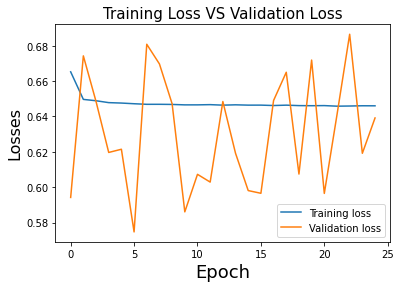

In [ ]:

import matplotlib.pyplot as plt
plt.plot(train_losses, label="Training loss")
plt.plot(val_losses, label="Validation loss")

print(train_losses)
print(val_losses)

plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Losses', fontsize=16)
plt.title('Training Loss VS Validation Loss', fontsize=15)

plt.legend()
plt.savefig('/content/drive/My Drive/Bibek/w10_p4-epoch1.eps')

#plt.title("Losses")

In [ ]:
model.eval()
fin_targets=[]
fin_outputs=[]


with torch.no_grad():
        val_loss, batch = 0, 1
        n_correct = 0
        n_samples = 0
        for emotions, targets in valid_loader:
            targets = data['targets'].to(device, dtype = torch.long)
            emotions=data['emotion'].to(device,dtype=torch.float)
            outputs = model(emotions)
            loss = criterion(outputs, targets)
            val_loss+=loss.item()
            # max returns (value ,index)
            _, predicted = torch.max(outputs.data, 1)
            n_samples += targets.size(0)
            n_correct += (predicted == targets).sum().item()
            fin_targets.extend(targets.cpu().detach().numpy().tolist())
            fin_outputs.extend(predicted.cpu().detach().numpy().tolist())
            batch +=1
        val_loss/=batch
        val_losses.append(val_loss)

        outputs=fin_outputs
        #outputs = np.array(outputs) >= 0.5
        targets=fin_targets

        acc = 100.0 * n_correct / n_samples
        f1_score_micro = metrics.f1_score(targets, outputs, average='micro')
        f1_score_macro = metrics.f1_score(targets, outputs, average='macro')
        print(f'Accuracy of the network on the 10000 test samples: {acc} %')
        print(f"Epoch: {epoch} - F1 Score on Testing Data (Macro) = {f1_score_macro}")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Accuracy of the network on the 10000 test samples: 60.714285714285715 %
Epoch: 24 - F1 Score on Testing Data (Macro) = 0.3777777777777777


In [ ]:
# df_demo=pd.read_csv("/content/drive/MyDrive/Bibek/LIAR-DATASET ORIGINAL/final/Demo.csv")
# df_demo['comment_text']=""
# df_demo['comment_text']= df_demo["statement"]+". "+df_demo['sentiment_code'].astype(str)

# df_demo['emotion']="["+df_demo['anger'].astype(str)+","+df_demo['disgust'].astype(str)+","\
# +df_demo['fear'].astype(str)+","+df_demo['joy'].astype(str)+","+df_demo['sad'].astype(str) + "]"
# for i in range(len(df_demo["emotion"])):
#   try:
#     df_demo["emotion"][i]=convert_to_list(df_demo["emotion"][i])
#   except:
#     print(i,"====",df_demo["emotion"][1])

# df_demo['list']=df_demo['list'].apply(convert_to_list)


# demo_set = CustomDataset(df_demo, tokenizer, MAX_LEN)

# demo_params = {'batch_size': 8,
#                 'shuffle': False,
#                 'num_workers': 0
#                 }
# demo_loader = DataLoader(demo_set, **demo_params)


# with torch.no_grad():
#     c=0
#     for _, data in enumerate(demo_loader, 0):
#         ids = data['ids'].to(device, dtype = torch.long)
#         mask = data['mask'].to(device, dtype = torch.long)
#         token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
#         targets = data['targets'].to(device, dtype = torch.float)
#         emotions=data['emotion'].to(device,dtype=torch.float)
#         c+=1
#         try:
#                       outputs = model(ids, mask, token_type_ids,emotions)
#                       fin_targets.extend(targets.cpu().detach().numpy().tolist())
#                       fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
#                       print(torch.sigmoid(outputs))
#                       # print(emotions)


#         except EOFError:
#           print(f"some error at {c}",EOFError)
